In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/renewable_energy_consumption_estat_data.csv')

# Rename columns
filtered_df = df.rename(columns={'country': 'Country',
                                'year': 'Year',
                                'population': 'Population',
                                'value':'Renewable energy consumption (%)'
                                })

# Sort
filtered_df = filtered_df.sort_values(by='Country')
filtered_df

,Country,Year,iso_code,Renewable energy consumption (%)
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [61]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 179 rows, 4 columns


In [62]:
# Get the distinct countries
distinct_countries_count = filtered_df['Country'].nunique()
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')


There are 37 countries in the dataset
Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia'
 'Euro area – 20 countries (from 2023)'
 'European Union - 27 countries (from 2020)' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo*' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


In [63]:
# Drop 'not countries'
rows_to_drop = ['Euro area – 20 countries (from 2023)', 'European Union - 27 countries (from 2020)']

filtered_df = filtered_df[~filtered_df['Country'].isin(rows_to_drop)]
filtered_df

,Country,Year,iso_code,Renewable energy consumption (%)
0,Albania,2019,AL,38.042
1,Albania,2020,AL,45.015
2,Albania,2021,AL,41.389
3,Albania,2022,AL,44.076
4,Albania,2023,AL,46.620
...,...,...,...,...
164,Sweden,2023,SE,66.393
163,Sweden,2022,SE,66.287
162,Sweden,2021,SE,62.527
161,Sweden,2020,SE,60.124


In [75]:
# Rename countries to match the names from other datasets
country_mapping = {
    'Kosovo*': 'Kosovo'
}

filtered_df['Country'] = filtered_df['Country'].replace(country_mapping)

In [76]:
# Get the distinct countries
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'Countries: {distinct_countries}')

Countries: ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Kosovo' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


Country                             0
Year                                0
iso_code                            0
Renewable energy consumption (%)    0
dtype: int64

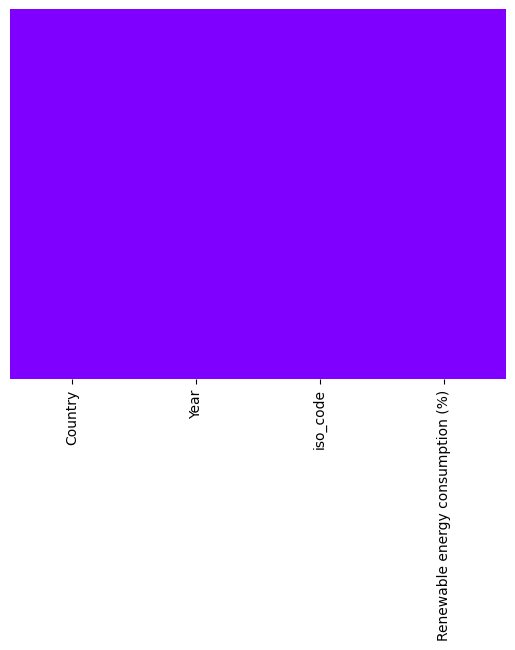

In [77]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [78]:
filtered_df.describe()

,Year,Renewable energy consumption (%)
count,171.000000,171.000000
mean,2020.959064,28.667760
std,1.407362,16.547847
min,2019.000000,7.046000
25%,2020.000000,17.382000
50%,2021.000000,22.671000
75%,2022.000000,37.181000
max,2023.000000,83.725000


In [79]:
# Prepare file for using for forecast

forecast_df = filtered_df[['Country', 'Year', 'Renewable energy consumption (%)']]
forecast_df = forecast_df.pivot(index='Country', columns='Year', values='Renewable energy consumption (%)')
forecast_df = forecast_df.reset_index()


# Save file
forecast_df.to_csv('../data_for_forecast/renewable_energy_consumption-clean.csv', index=False)
forecast_df.head()


Year,Country,2019,2020,2021,2022,2023
0,Albania,38.042,45.015,41.389,44.076,46.620
1,Austria,33.755,36.545,34.792,34.075,40.844
2,Belgium,9.929,13.000,13.076,13.816,14.741
3,Bosnia and Herzegovina,37.454,39.835,36.562,NaN,NaN
4,Bulgaria,21.545,23.319,19.445,19.044,22.549


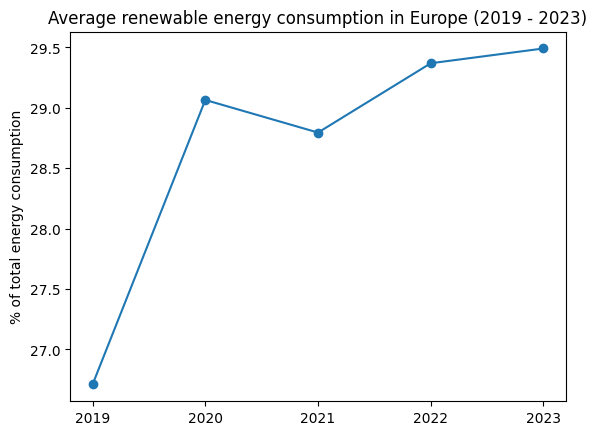

In [80]:
# TREND ANALYSIS OVER TIME - FINAL ENERGY CONSUPMTION OVER THE YEARS

yearly_fec = filtered_df.groupby('Year')['Renewable energy consumption (%)'].mean()
plt.plot(yearly_fec.index, yearly_fec.values, marker='o')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('Average renewable energy consumption in Europe (2019 - 2023)')
plt.ylabel('% of total energy consumption')
plt.show()

                   Country  Renewable energy consumption (%)
15                 Iceland                         80.499250
26                  Norway                         75.455600
34                  Sweden                         62.223200
10                 Finland                         45.611000
0                  Albania                         43.028400
19                  Latvia                         42.420000
23              Montenegro                         40.666000
8                  Denmark                         39.458600
3   Bosnia and Herzegovina                         37.950333
1                  Austria                         36.002200


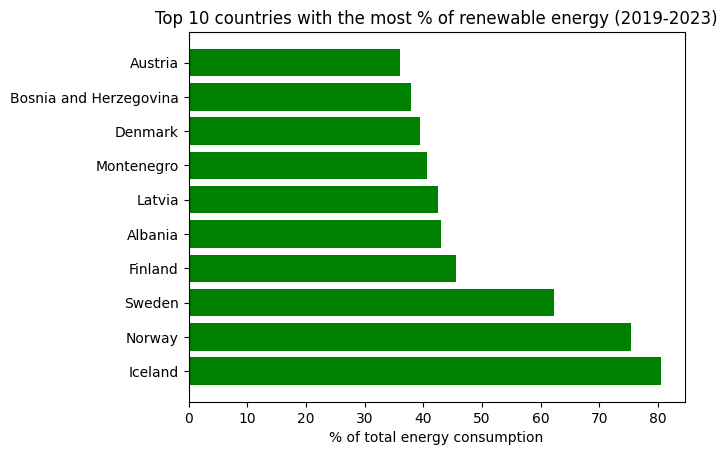

In [81]:
# TOP COUNTRIES WITH THE MOST % OF RENEWABLE ENERGY CONSUMPTION

avg_renewable_energy_consumption = filtered_df.groupby('Country')['Renewable energy consumption (%)'].mean().reset_index()

top_countries = avg_renewable_energy_consumption[['Country', 'Renewable energy consumption (%)']].sort_values(by='Renewable energy consumption (%)', ascending=False)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Renewable energy consumption (%)'][:10], color='green')
plt.title('Top 10 countries with the most % of renewable energy (2019-2023)')
plt.xlabel('% of total energy consumption')
plt.show()


           Country  Renewable energy consumption (%)
21      Luxembourg                           11.8176
22           Malta                           12.1242
2          Belgium                           12.9124
24     Netherlands                           13.7110
16         Ireland                           13.8912
14         Hungary                           14.5726
27          Poland                           16.0552
31        Slovakia                           17.2258
7   Czech Republic                           17.5730
6           Cyprus                           17.8730


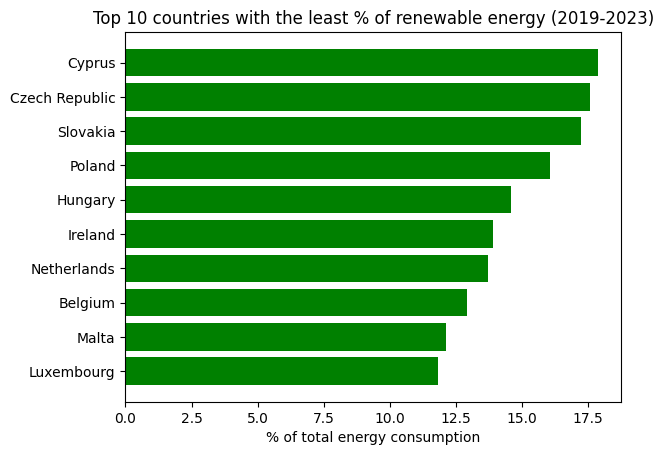

In [82]:
# TOP COUNTRIES WITH THE LEAST % OF RENEWABLE ENERGY CONSUMPTION

avg_renewable_energy_consumption = filtered_df.groupby('Country')['Renewable energy consumption (%)'].mean().reset_index()

top_countries = avg_renewable_energy_consumption[['Country', 'Renewable energy consumption (%)']].sort_values(by='Renewable energy consumption (%)', ascending=True)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Renewable energy consumption (%)'][:10], color='green')
plt.title('Top 10 countries with the least % of renewable energy (2019-2023)')
plt.xlabel('% of total energy consumption')
plt.show()



In [83]:
# Renewable energy consumption  - higher % of -> better sustainability 

avg_renewable_energy_consumption = filtered_df.groupby('Country')['Renewable energy consumption (%)'].mean().reset_index()

max_value = avg_renewable_energy_consumption['Renewable energy consumption (%)'].max()
min_value = avg_renewable_energy_consumption['Renewable energy consumption (%)'].min()

avg_renewable_energy_consumption['renewable_energy_subindex'] = (avg_renewable_energy_consumption['Renewable energy consumption (%)'] - min_value)/(max_value - min_value)

avg_renewable_energy_consumption.sort_values(by='renewable_energy_subindex', ascending=False)

,Country,Renewable energy consumption (%),renewable_energy_subindex
15,Iceland,80.499250,1.000000
26,Norway,75.455600,0.926565
34,Sweden,62.223200,0.733902
10,Finland,45.611000,0.492030
0,Albania,43.028400,0.454427
19,Latvia,42.420000,0.445569
23,Montenegro,40.666000,0.420031
8,Denmark,39.458600,0.402451
3,Bosnia and Herzegovina,37.950333,0.380491
1,Austria,36.002200,0.352126


In [84]:
avg_renewable_energy_consumption.to_csv('../data_subindex/subindex_renewable_energy_consumption_2019-2023.csv', index=False)

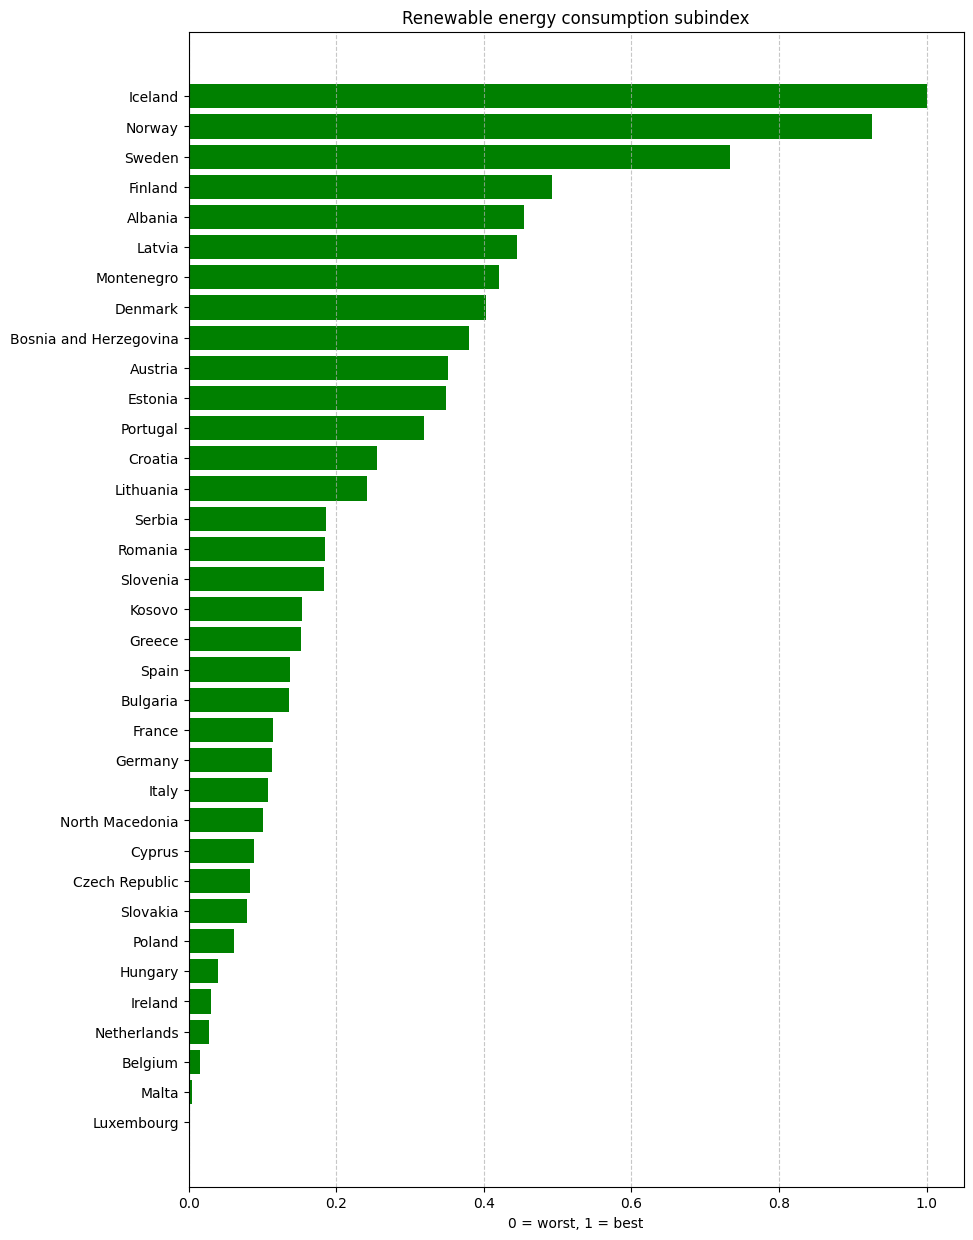

In [85]:
avg_renewable_energy_consumption = avg_renewable_energy_consumption.sort_values(by='renewable_energy_subindex')

plt.figure(figsize=(10,15))
plt.barh(avg_renewable_energy_consumption['Country'],avg_renewable_energy_consumption['renewable_energy_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('Renewable energy consumption subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()